In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import os
# os.getcwd()
os.chdir('C:/Users/LYH/Desktop/mlstudy')
import seaborn as sns 

In [6]:
os.getcwd()

'C:\\Users\\LYH\\Desktop\\mlstudy'

In [10]:
#데이터 불러오기
planet_df = pd.read_csv('planet.csv').iloc[0:,2:]
planet_df.head(3)

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,...,u_ratio,g_ratio,r_ratio,i_ratio,z_ratio,du_ratio,dg_ratio,dr_ratio,di_ratio,dz_ratio
0,20.569484,19.015036,18.216944,17.857745,17.878267,0.000218,18.95452,17.77918,17.36149,17.22072,...,0.219906,0.203288,0.194756,0.190915,0.191135,0.213666,0.200417,0.195709,0.194122,0.196086
1,19.219982,18.402198,18.254012,18.021883,17.915781,0.038436,19.12234,18.31982,18.19839,17.98221,...,0.209336,0.200429,0.198815,0.196287,0.195132,0.208945,0.200176,0.198849,0.196487,0.195543
2,25.896876,22.103648,20.490849,18.857178,17.931170,-0.000012,23.94866,21.10701,19.82161,18.36794,...,0.245982,0.209952,0.194632,0.179115,0.170319,0.237577,0.209387,0.196636,0.182215,0.174186


In [190]:
planet_df.shape #(8000,73)
print(planet_df.info())
# print(planet_df.describe())
print(planet_df[['redshift','nObserve','nDetect','airmass_u']].describe())
planet_rna = planet_df[['redshift', 'nObserve','airmass_u']]
#nObserve, nDetect / airmass_u~z 상관계수 1 .. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 73 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   u                 8000 non-null   float64
 1   g                 8000 non-null   float64
 2   r                 8000 non-null   float64
 3   i                 8000 non-null   float64
 4   z                 8000 non-null   float64
 5   redshift          8000 non-null   float64
 6   dered_u           8000 non-null   float64
 7   dered_g           8000 non-null   float64
 8   dered_r           8000 non-null   float64
 9   dered_i           8000 non-null   float64
 10  dered_z           8000 non-null   float64
 11  nObserve          8000 non-null   int64  
 12  nDetect           8000 non-null   int64  
 13  airmass_u         8000 non-null   float64
 14  airmass_g         8000 non-null   float64
 15  airmass_r         8000 non-null   float64
 16  airmass_i         8000 non-null   float64


In [145]:
print(planet_df.isnull().sum())
print(planet_df['class'])

In [91]:
#class (target 변수제외한 데이터 만들기)
planet_features = planet_df.drop('class', axis = 1)
planet_uz = planet_features.iloc[:,:5]
planet_dered = planet_features.iloc[:,6:11]
planet_target = planet_df['class']
#featrue - planet_features
#target - planet_target

## target 변수 범주형 변환 

In [163]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(planet_target)
print(type(label))
planet_target = pd.DataFrame(label)
planet_target.columns = ['class']
print(planet_target.head())

<class 'numpy.ndarray'>
   class
0      0
1      1
2      0
3      1
4      0


## 상관관계 분석 후 상관관계가 높은 변수 차원축소

## u~z 간 히트맵  

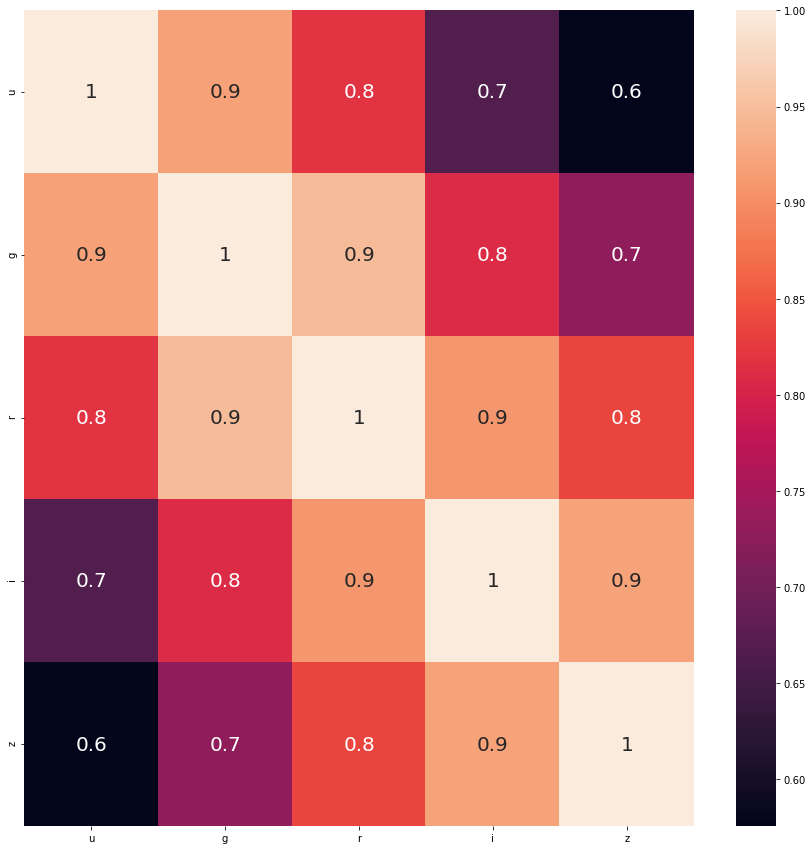

In [115]:
corr0 = planet_uz.corr()
corr1 = planet_dered.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr0 , annot = True , fmt = '.1g',  annot_kws={"size": 20})
# u~z 간 상관관계 높음

## dered_ 변수 간 히트맵 

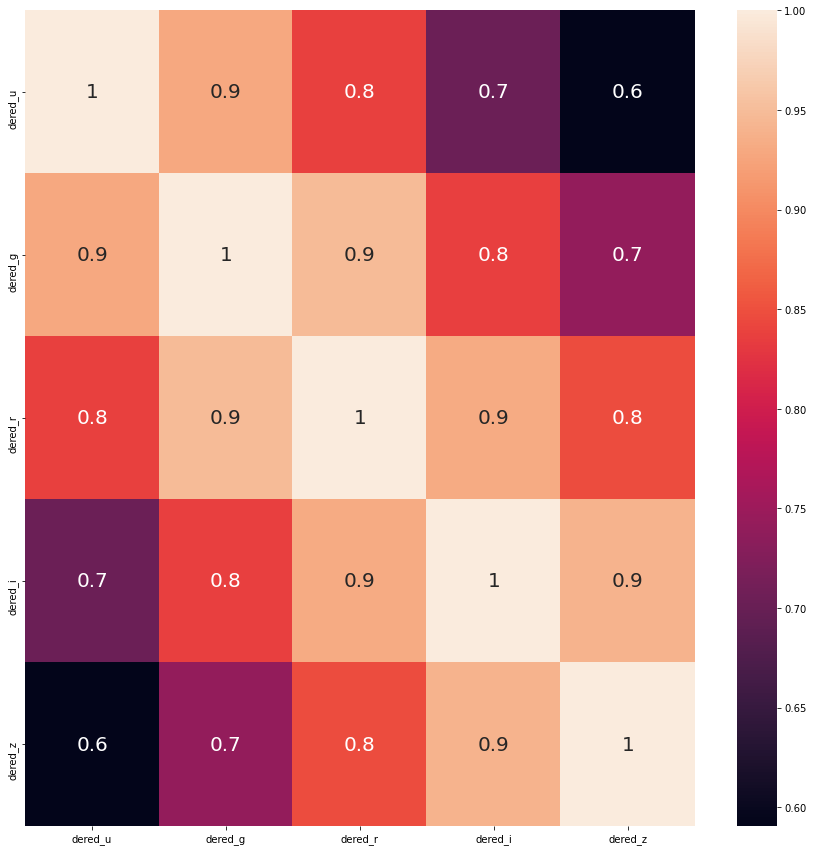

In [116]:
#dered 간 상관관계 높음
#airmass 간 상관관계 1 ..
plt.figure(figsize = (15,15))
sns.heatmap(corr1 , annot = True , fmt = '.1g',  annot_kws={"size": 20})

## 표준화 및 PCA 차원 축소 

In [94]:
from sklearn.preprocessing import StandardScaler 

planet_uz_scaled = StandardScaler().fit_transform(planet_uz)

In [168]:
from sklearn.decomposition import PCA #PCA import 

pca = PCA(n_components = 5) #pca 주성분 설정 

pca.fit(planet_uz_scaled) 
uz_pca = pca.transform(planet_uz_scaled) # pc score 값으로 이루어진 ndarray 반환 
#uz_pca = pca.fit_transform(planet_uz_scaled) 위와 같은 코드 
# print(uz_pca.shape)
# print(uz_pca)

In [170]:
pca_columns = ['PC1', 'PC2', 'PC3' , 'PC4' , 'PC5'] #pca 주성분 변수 이름 객체 설정 
planet_uz_df = pd.DataFrame(uz_pca, columns = pca_columns)  #nd.array 형태의 pca -> pd.dataframe 형태로 변환 
planet_uz_df['target'] = planet_target['class'] #class 변수 추가 
print(planet_uz_df.head())

        PC1       PC2       PC3       PC4       PC5  target
0  0.954882  0.168884 -0.202187  0.046345  0.019189       0
1  0.569222  0.805293  0.097903  0.044909 -0.066323       1
2  4.097277 -1.913181 -0.213487 -0.233204 -0.204968       0
3 -0.486009  0.384276  0.100561  0.075470 -0.017850       1
4  1.487013  0.755161 -0.084269  0.010085 -0.043688       0


In [171]:
print(pca.explained_variance_ratio_) #전체 데이터 대비 PC1 ,PC2 변수의 설명 가능 비율
eigenvalue = pca.explained_variance_ #PC1 ,PC2 변수 eigenvalue(분산) 값 
print(eigenvalue)
#주성분 선택 조건 
# 1 . 주로 2~3 개 
# 2. eigenvalue(분산) > 1 
# 3. elbow point (scree plot 을 그렸을 때 크게 꺾이는 점 까지)

[0.85265936 0.11208049 0.01918186 0.01200843 0.00406986]
[4.26382976 0.56047253 0.09592129 0.06004968 0.02035182]


## Scree plot

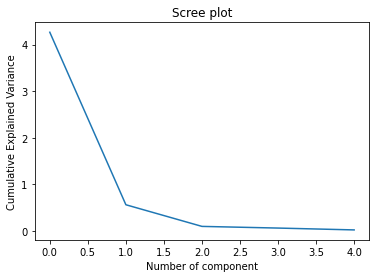

In [172]:
plt.title('Scree plot')
plt.xlabel('Number of component')
plt.ylabel('Cumulative Explained Variance')
plt.plot(eigenvalue) # 아래 그림 결과 첫 번째 주성분이 거의 모든 데이터를 설명할 수 있음을 알 수 있음 

In [99]:
#주성분분석을 하지 않은 채 u~z값으로 랜덤포레스트 실행 결과 정확도
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트 import 
from sklearn.model_selection import cross_val_score #교차검증 import 

rcf = RandomForestClassifier(random_state = 111) #모델 설정 
scores = cross_val_score(rcf , planet_uz , planet_target, scoring = 'accuracy' , cv=5)
# model, train, target, cross validation
print(scores) #주성분분석을 하지 않고 랜덤포레스트를 한 결과 accuracy 83% 의 성능을 보여주고 있다.
print(np.mean(scores))

[0.820625 0.8425   0.839375 0.829375 0.82375 ]
0.8311250000000001


In [179]:
#주성분 2개를 사용한 정확도 10%감소
pca_x = planet_uz_df[['PC1','PC2']] #5개 중 2개만 선택
scores_pca = cross_val_score(rcf , pca_x, planet_target , scoring='accuracy' , cv = 5)
print(scores_pca)
print(np.mean(scores_pca))

C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed

[0.726875 0.7175   0.73     0.735625 0.72375 ]
0.72675


# class 별 분포 확인(시각화)_교재참고  

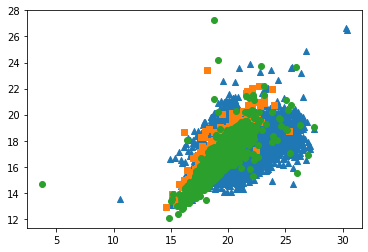

In [101]:
markers = ['^' , 's' , 'o']

for i, marker in enumerate(markers) : 
    x_axis_data = planet_df[planet_df['class'] == i]['u']
    y_axis_data = planet_df[planet_df['class'] == i]['z']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)

# dered 차원 축소 실습

In [106]:
planet_dered_scaled = StandardScaler().fit_transform(planet_dered)

In [173]:
pca2 = PCA(n_components = 2)

dered_pca = pca2.fit_transform(planet_dered_scaled) #pca 모델 피팅

In [108]:
pca_columns = ['PC1', 'PC2']
planet_dered_df = pd.DataFrame(dered_pca, columns = pca_columns)
planet_dered_df['target'] = planet_df['class']
print(planet_dered_df.head(3))

        PC1       PC2  target
0  0.228532  0.506551       0
1 -0.662300  0.782146       1
2 -3.060555 -1.441823       0


In [109]:
print(pca2.explained_variance_ratio_)

[0.86628524 0.10645517]


# dered 변수 랜덤포레스트 정확도

In [113]:
rcf2 = RandomForestClassifier(random_state = 112) #모델 설정 
scores2 = cross_val_score(rcf2 , planet_dered , planet_target, scoring = 'accuracy' , cv=5)
# model, train, target, cross validation
print(scores2)
print(np.mean(scores2))

[0.836875 0.845625 0.833125 0.841875 0.8375  ]
0.8390000000000001


# PCA 변환한 dered 변수 랜덤포레스트 정확도 

In [114]:
pca_dered = planet_dered_df[['PC1','PC2']]
scores_dered_pca = cross_val_score(rcf2 , pca_dered, planet_target , scoring='accuracy' , cv = 5)
print(scores_dered_pca)
print(np.mean(scores_dered_pca))

[0.7425   0.741875 0.733125 0.745625 0.735625]
0.7397500000000001


# U~Z , dered 변수 합쳐서 PCA해보기 

In [124]:
planet_ten = planet_features.drop('redshift',axis = 1)
planet_ten = planet_ten.iloc[:,:10] #변수 10개 

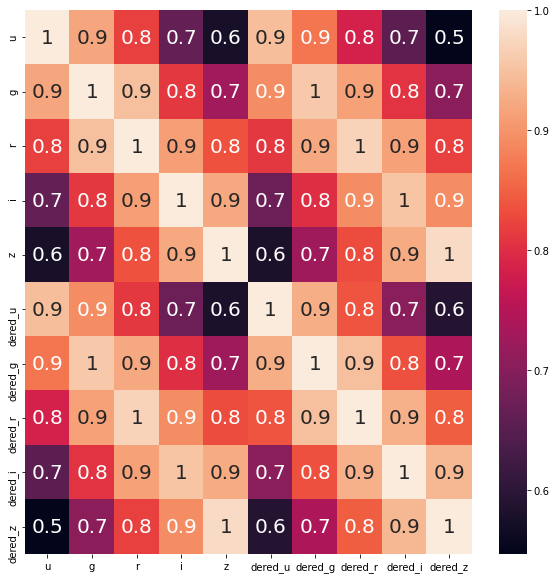

In [130]:
corr_ten = planet_ten.corr()
# print(corr_ten)
plt.figure(figsize = (10,10))
sns.heatmap(corr_ten , annot = True , fmt = '.1g',  annot_kws={"size": 20})

In [131]:
rcf3 = RandomForestClassifier(random_state = 112) #모델 설정 
scores3 = cross_val_score(rcf3 , planet_ten , planet_target, scoring = 'accuracy' , cv=5)
# model, train, target, cross validation
print(scores3)
print(np.mean(scores3))

[0.83375  0.838125 0.833125 0.84125  0.840625]
0.837375


In [132]:
planet_ten_scaled = StandardScaler().fit_transform(planet_ten)

In [138]:
pca3 = PCA(n_components = 2)

ten_pca = pca3.fit_transform(planet_ten_scaled)
print(ten_pca.shape)

(8000, 2)


In [142]:
eigenvalue = pca3.explained_variance_
print(eigenvalue) #PC1 의 eigenvalue(분산) 8.462 PC2 의 약 8배 

[8.46297369 1.06292891]


In [139]:
pca_columns = ['PC1', 'PC2']
planet_ten_df = pd.DataFrame(ten_pca, columns = pca_columns)
planet_ten_df['target'] = planet_df['class']
print(planet_ten_df.head(3))

        PC1       PC2  target
0  0.510903  0.453473       0
1  0.874920  1.120980       1
2  5.049420 -2.412287       0


In [140]:
print(pca3.explained_variance_ratio_) #pca 주성분 2개만으로 10개의 변수를 2개의 주성분으로 95%이상 설명 가능

[0.84619158 0.1062796 ]


In [141]:
rcf3 = RandomForestClassifier(random_state = 112) #모델 설정 

pca_ten = planet_ten_df[['PC1','PC2']]
scores_ten_pca = cross_val_score(rcf3 , pca_ten, planet_target , scoring='accuracy' , cv = 5)
print(scores_dered_pca)
print(np.mean(scores_dered_pca))

[0.7425   0.741875 0.733125 0.745625 0.735625]
0.7397500000000001


# 다른 모든 연속형 변수 PCA 적용

In [176]:
planet_residual = planet_features.iloc[:,18:]

In [178]:
rcf = RandomForestClassifier(random_state = 1) #모델 설정 
scores_residual = cross_val_score(rcf ,planet_residual , planet_target, scoring = 'accuracy' , cv=10)
# model, train, target, cross validation
print(scores_residual)
print(np.mean(scores_residual)) # accuracy 0.8908750000000001 

C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed

[0.88125 0.885   0.88625 0.89125 0.885   0.91    0.89125 0.895   0.8975
 0.88625]
0.8908750000000001


# 피쳐 변수 묶어주기

In [195]:
planet_concat = pd.concat([planet_uz, planet_dered],axis=1)
planet_concated = pd.concat([planet_concat, planet_residual], axis = 1)
planet_merged = pd.concat([planet_rna, planet_concated], axis =1)
# print(planet_concated.info())

In [192]:
rcf = RandomForestClassifier(random_state = 2) 
scores_merged = cross_val_score(rcf ,planet_merged , planet_target, scoring = 'accuracy' , cv=10)
print(scores_merged)
print(np.mean(scores_merged)) #accuracy = 0.9165000000000001

C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed

[0.9225  0.93125 0.91    0.905   0.9     0.9275  0.915   0.9175  0.925
 0.91125]
0.9165000000000001


In [196]:
planet_merged_scaled = StandardScaler().fit_transform(planet_merged) #표준화 스케일링 

In [215]:
pca = PCA(n_components = 10) #주성분 5개 

merged_pca = pca.fit_transform(planet_merged_scaled)
# print(type(merged_pca))

In [216]:
eigenvalue = pca.explained_variance_
explain = pca.explained_variance_ratio_
print(explain)
print(eigenvalue)

sum(explain) #98.2% 의 설명력 

[0.52210257 0.16090515 0.10211889 0.06312115 0.04324945 0.03048531
 0.01771421 0.01685181 0.01491189 0.01075118]
[34.98524566 10.7819931   6.84282112  4.22964586  2.8980752   2.0427713
  1.18700077  1.12921249  0.99922131  0.72041892]


0.9822116220560678

In [217]:
pca_columns = ['PC1', 'PC2', 'PC3' , 'PC4' , 'PC5', 'PC6', 'PC7' , 
              'PC8' , 'PC9', 'PC10'] #pca 주성분 변수 이름 객체 설정 
planet_merged_df = pd.DataFrame(merged_pca, columns = pca_columns)  #nd.array 형태의 pca -> pd.dataframe 형태로 변환 

In [219]:
rcf = RandomForestClassifier(random_state = 3)
scores_pca = cross_val_score(rcf , planet_merged_df, planet_target , scoring='accuracy' , cv = 10)
print(scores_pca)
print(np.mean(scores_pca)) #0.8939999999999999

C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed

[0.89875 0.9025  0.9075  0.885   0.875   0.895   0.88625 0.88875 0.90875
 0.8925 ]
0.8939999999999999


## LDA 적용하기 

In [226]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA 
from sklearn.preprocessing import StandardScaler #스케일링 

merged_scaled = StandardScaler().fit_transform(planet_merged)

In [230]:
lda = LinearDiscriminantAnalysis(n_components = 2) #범주 개수 보다 최소 한 개 작아야함 
lda.fit(merged_scaled, planet_target)
planet_lda = lda.transform(merged_scaled)
print(planet_lda)

[[ 1.11403133  0.14919715]
 [-0.05514831  1.77049236]
 [ 2.70305424 -1.28331361]
 ...
 [ 0.57154856 -1.12249017]
 [-1.17535616 -0.08668048]
 [ 0.41077821 -1.66022173]]


C:\Users\LYH\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [232]:
lda_columns = ['LC1','LC2']
planetDF_lda = pd.DataFrame(planet_lda, columns = lda_columns)

In [234]:
rcf = RandomForestClassifier(random_state = 222)
scores_lda = cross_val_score(rcf , planetDF_lda, planet_target , scoring='accuracy' , cv = 10)
print(scores_lda)
print(np.mean(scores_lda)) #0.80275 

C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LYH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed

[0.81    0.79625 0.80375 0.775   0.8025  0.82375 0.79875 0.81125 0.82125
 0.785  ]
0.80275


# 학습 결론 
- PCA , LDA 비교 결과 변수가 많을 경우 PCA가 더 성능이 높았다. 나름의 이유를 찾아보자면 LDA의 고유벡터는 범주형 반응변수의 범주 -1 개 만큼 만들 수 있으므로 랜덤포래스트 모델을 돌렸을 때는 가지 수가 적어 성능이 좋지 않게 나왔다고 볼 수 있을 것 같습니다. LDA 는 분산 대비 평균차이를 극대화 하는 Boundary 를 찾는 것이 목적이므로 비교적 iris_data 와 같이 분류전 데이터의 분포가 잘 나뉘어진 데이터에는 성능이 좋을 것으로 예상되며 PCA 는 70개 가 넘는 변수들을 10개의 주성분 변수로 축소하여도 전체 데이터의 98%이상을 설명할 수 있었고 모델을 돌려보아도 정확도 면에서 2% 가량 떨어지는 것을 알 수 있었지만 그에 비해 많은 차원을 축소 했다는 것을 미루어 보아 (천체분류데이터) 에서는 PCA 가 차원축소에 더 좋은 모델이라고 할 수 있을 것 같습니다.

# 학습을 하면서 부족했던 점
- 학습데이터와 테스트데이터를 나누어 성능 평가를 하지 않은 점 
- 책에서 많이 못 벗어나는 분석을 했다는 점 
